In [1]:
%matplotlib inline


# Bias and variance of polynomial fit


Demo overfitting, underfitting, and validation and learning curves with
polynomial regression.

Fit polynomes of different degrees to a dataset: for too small a degree,
the model *underfits*, while for too large a degree, it overfits.




In [2]:
import numpy as np
import matplotlib.pyplot as plt


def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

A polynomial regression



In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

A simple figure to illustrate the problem



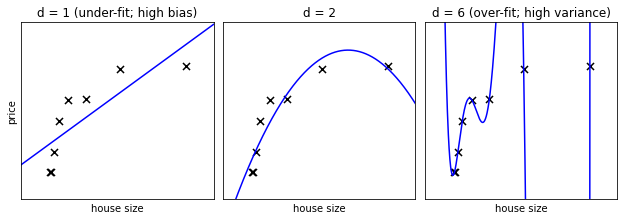

In [4]:
n_samples = 8

np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ['d = 1 (under-fit; high bias)',
          'd = 2',
          'd = 6 (over-fit; high variance)']
degrees = [1, 2, 6]

fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('house size')
    if i == 0:
        ax.set_ylabel('price')

    ax.set_title(titles[i])

Generate a larger dataset



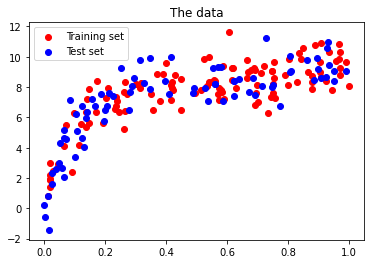

In [5]:
from sklearn.model_selection import train_test_split

n_samples = 200
test_size = 0.4
error = 1.0

# randomly sample the data
np.random.seed(1)
x = np.random.random(n_samples)
y = generating_func(x, error)

# split into training, validation, and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

# show the training and validation sets
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, color='red', label='Training set')
plt.scatter(x_test, y_test, color='blue', label='Test set')
plt.title('The data')
plt.legend(loc='best')

Plot a validation curve



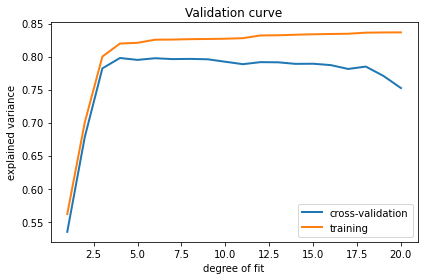

In [6]:
from sklearn.model_selection import validation_curve

degrees = np.arange(1, 21)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                 model, x[:, np.newaxis], y,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

Learning curves
###########################################################

 Plot train and test error with an increasing number of samples



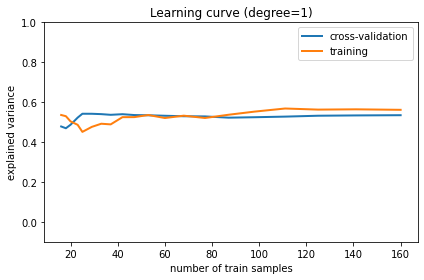

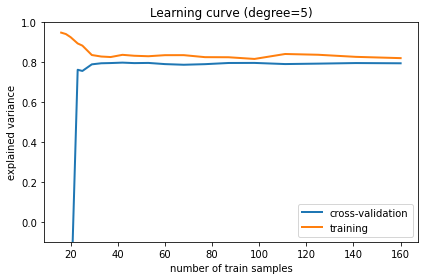

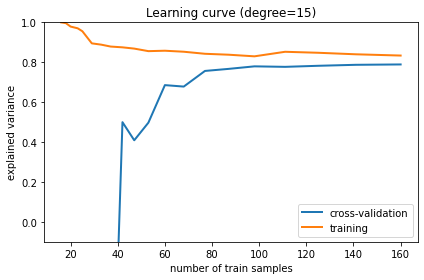

In [7]:
# A learning curve for d=1, 5, 15
for d in [1, 5, 15]:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())

    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, validation_scores = learning_curve(
        model, x[:, np.newaxis], y,
        train_sizes=np.logspace(-1, 0, 20))

    # Plot the mean train error and validation error across folds
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, validation_scores.mean(axis=1),
            lw=2, label='cross-validation')
    plt.plot(train_sizes, train_scores.mean(axis=1),
                lw=2, label='training')
    plt.ylim(ymin=-.1, ymax=1)

    plt.legend(loc='best')
    plt.xlabel('number of train samples')
    plt.ylabel('explained variance')
    plt.title('Learning curve (degree=%i)' % d)
    plt.tight_layout()


plt.show()